# PracticalSession_Geospatial_data_analysis

**Introduction**
The goals for this session are multiple: Use the Jupyter computing environment, that is a widely used tool to develop and share data analysis and data visualization workflows.

**Understanding the basic techniques**
- Loading CSV Uber Data file
- Data transformation
- Create Functions
- Use matplotlib, pandas, seaborn
- Use a simple plot for ploting Uber longitute and latitude data

**Load the data**
Download the data from https://drive.google.com/open?id=1PUmKJUh3jW5IAud1JjJUotkd5iPCUaLi

Use pandas.read_csv to read the csv file

**Perform Data transformation**
- Use .map(pandas.to_datetime) for better date transformation
- Creating a function for finding the day of the month example: def get_dom(dt): return dt.day data['dom'] = data['Date/Time'].map(get_dom)
- Creating a function for finding the weekday and hours example: def get_weekday(dt): return dt.weekday() data['weekday']= data['Date/Time'].map(get_weekday)
- Analyse the day of month

**Visual representation**
- Use hist for creating histogram with bins = 30, rwidth=0.8, range=(0.5,30.5)
- Label the title as Frequency by DoM - Uber - April 2014, x-axis Date of the month and y-axis Frequency
- Creating a function for Grouping the data by date of month (dom) example: def count_rows(rows): return len(rows)
- Use plot, bar function to plot the data by date
- Sort the data by date and use bar function to plot the sorted data by date (.sort_values())
- Visualise the data by hours using histogram with bins=24,range=(0.5,24)
- Visualise the data by weekday using histogram with bins=7,range = (-.5,6.5), rwidth=0.8
- Check the use of xticks and add 'Mon Tue Wed Thu Fri Sat Sun'.split()

**Performing Cross Analysis**
- Group the data by weekday and hour using .apply(count_rows).unstack()
- Create heatmap using seaborn.heatmap for the grouped data
- Analyse both Latitude and Longitude data represent the specific ranges for each respectively
- Example Latitude range =(40.5,41) and likewise set for Longitude
- Merge the two histograms Latitude and Longitude using twiny()
- Plot the dots for both Latitude and Longitude set the figsize=(20, 20)

**“By visualizing information, we turn it into a landscape that you can explore with your eyes. A sort of information map. And when you’re lost in information, an information map is kind of useful.”**

## Installing and Importing Library and data file

In [1]:
#Installing the necessary libraries
#!pip install pandas numpy matplotlib seaborn

In [2]:
#Importing libraries to the local environment and create abbrevations for easier usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
path = "data/uber-raw-data-apr14.csv" #reading the csv file : Note that you have downloaded the csv file to the location

In [3]:
df = pd.read_csv(path, delimiter = ',') #Using delimiter for identifying the different columns

In [6]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
df.tail() # Be sure to see if the file is completed and truncated properly.

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


## Use .map(pandas.to_datetime) for better date transformation

Note : It takes time depending on your machines memory

In [8]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])

## Creating a function for finding the day of the month example: def get_dom(dt): return dt.day data['dom'] = data['Date/Time'].map(get_dom)

In [4]:
def get_dom(dt):
    return dt.day

In [11]:
df['day'] = df['Date/Time'].map(get_dom)

In [11]:
df.head()

,Date/Time,Lat,Lon,Base,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [12]:
df.describe() #Useful command to quickly see how the file distribution for each column

,Lat,Lon,day
count,564516.000000,564516.000000,564516.000000
mean,40.740005,-73.976817,16.117127
std,0.036083,0.050426,9.048139
min,40.072900,-74.773300,1.000000
25%,40.722500,-73.997700,8.000000
50%,40.742500,-73.984800,16.000000
75%,40.760700,-73.970000,24.000000
max,42.116600,-72.066600,30.000000


In [12]:
def get_weekday(dt):
    return dt.weekday() #.weekday() is a method

In [13]:
df['weekday']= df['Date/Time'].map(get_weekday)

In [15]:
df.head()

,Date/Time,Lat,Lon,Base,day,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1


In [14]:
def get_hour(dt):
    return dt.hour #.hour is an attribute

In [15]:
df['hour'] = df['Date/Time'].map(get_hour)

In [18]:
df.head()

,Date/Time,Lat,Lon,Base,day,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


In [19]:
df.describe()

,Lat,Lon,day,weekday,hour
count,564516.000000,564516.000000,564516.000000,564516.00000,564516.000000
mean,40.740005,-73.976817,16.117127,2.86698,14.465043
std,0.036083,0.050426,9.048139,1.82081,5.873925
min,40.072900,-74.773300,1.000000,0.00000,0.000000
25%,40.722500,-73.997700,8.000000,1.00000,10.000000
50%,40.742500,-73.984800,16.000000,3.00000,16.000000
75%,40.760700,-73.970000,24.000000,4.00000,19.000000
max,42.116600,-72.066600,30.000000,6.00000,23.000000


Text(0.5, 0, 'Days of the month')

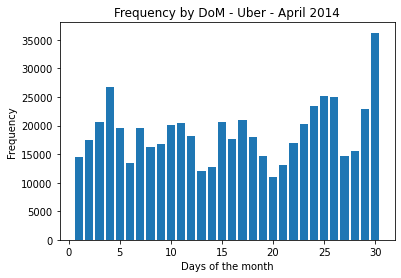

In [16]:
hist = df["day"].plot.hist(bins = 30, rwidth = 0.8, range=(0.5,30.5), 
                             title = "Frequency by DoM - Uber - April 2014")
plt.xlabel('Days of the month')

## Creating a function for Grouping the data by date of month (dom) example: def count_rows(rows): return len(rows)

In [17]:
def count_rows(rows):
    return len(rows)

In [18]:
by_date = df.groupby('day').apply(count_rows)
by_date

day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [19]:
by_date.dtypes

dtype('int64')

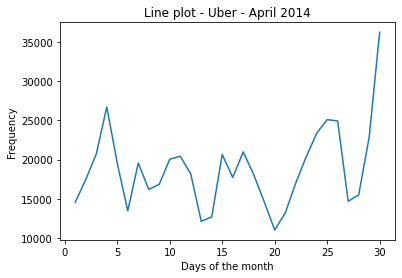

In [23]:
plt.title('Line plot - Uber - April 2014');
plt.xlabel('Days of the month')
plt.ylabel('Frequency')
plt.plot(by_date);

## Use plot, bar function to plot the data by date Sort the data by date and use bar function to plot the sorted data by date (.sort_values())

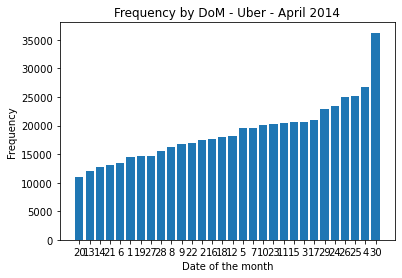

In [24]:
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel('Date of the month')
plt.ylabel('Frequency')
plt.title('Frequency by DoM - Uber - April 2014');

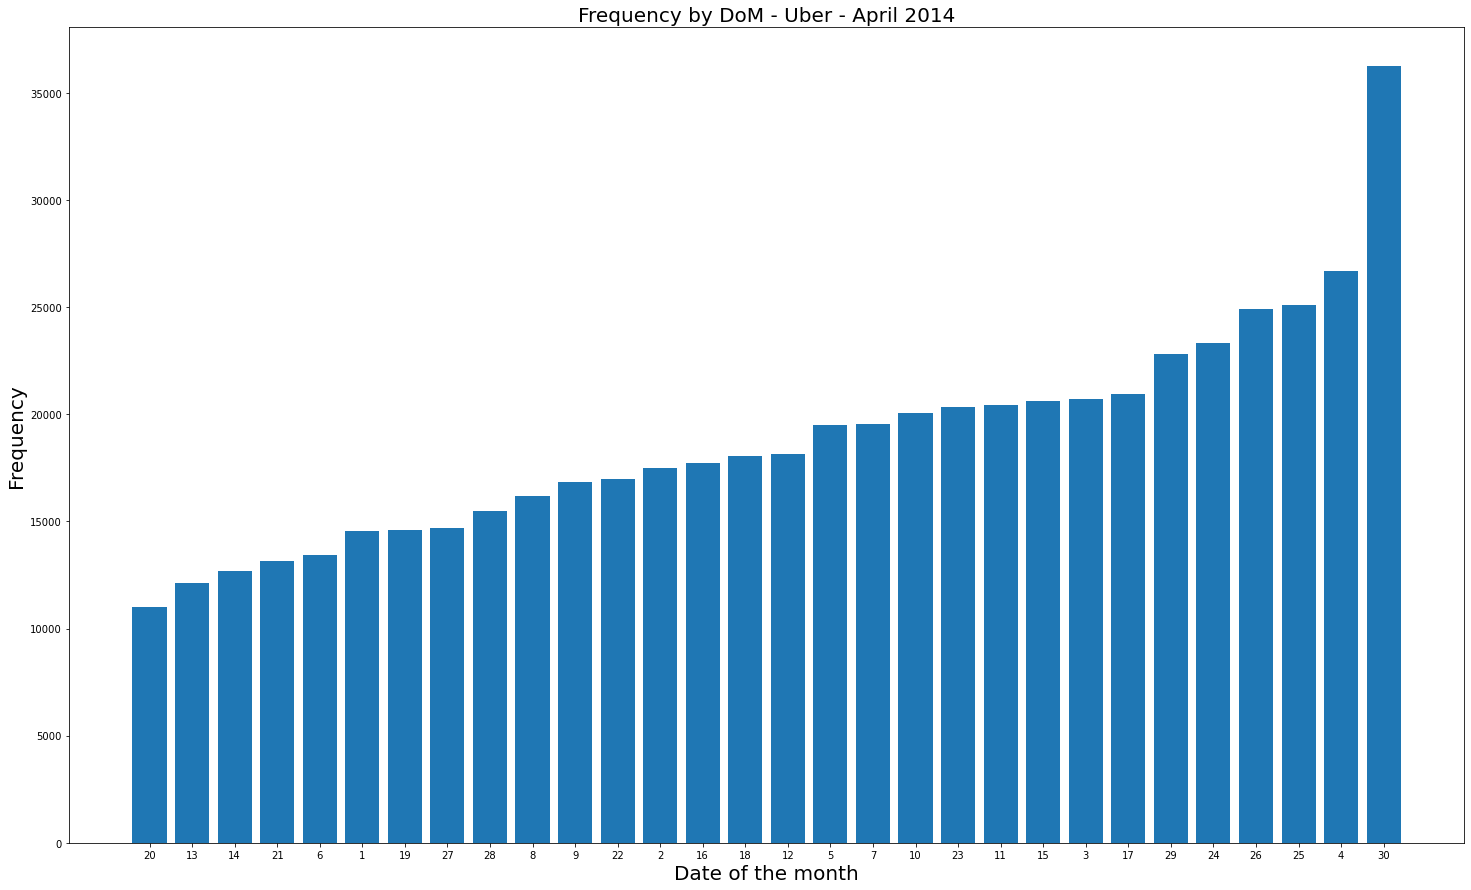

In [25]:
plt.figure(figsize = (25, 15))
plt.bar(range(1, 31), by_date.sort_values())
plt.xticks(range(1, 31), by_date.sort_values().index)
plt.xlabel(('Date of the month'), fontsize=20)
plt.ylabel(('Frequency'), fontsize=20)
plt.title(('Frequency by DoM - Uber - April 2014'), fontsize=20);

## Visualise the data by hours using histogram with bins=24,range=(0.5,24)

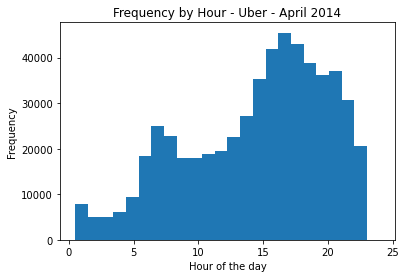

In [26]:
plt.hist(df.hour, bins = 24, range = (0.5, 24))
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - Uber - April 2014');

## Visualise the data by weekday using histogram with bins=7,range = (-.5,6.5), rwidth=0.8

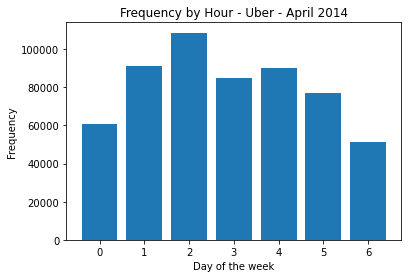

In [27]:
#plt.figure(figsize = (15, 15))
plt.hist(df.weekday, bins = 7, rwidth = 0.8, range = (-.5, 6.5))
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency by Weekday - Uber - April 2014');

## Check the use of xticks and add 'Mon Tue Wed Thu Fri Sat Sun'.split()

In [20]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this

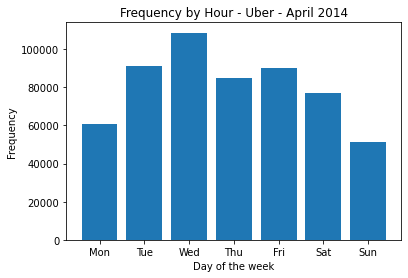

In [28]:
plt.hist(df.weekday, bins = 7, rwidth = 0.8, range = (-.5, 6.5))
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Frequency by Hour - Uber - April 2014')
plt.xticks(np.arange(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.show()

## Group the data by weekday and hour using .apply(count_rows).unstack()

In [21]:
df2 = df.groupby(['weekday', 'hour']).apply(count_rows).unstack()
df2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393


## Create heatmap using seaborn.heatmap for the grouped data

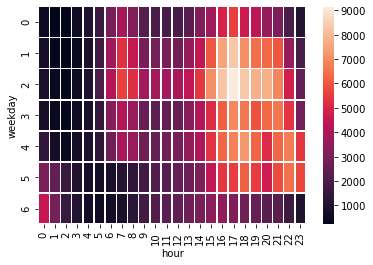

In [30]:
sns.heatmap(df2, linewidths = .5);

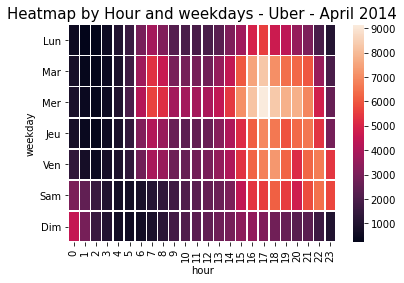

In [31]:
heatmap = sns.heatmap(df2, linewidths = .5);
#Annoted heatmap
plt.title('Heatmap by Hour and weekdays - Uber - April 2014',fontsize=15)
heatmap.set_yticklabels(('Lun Mar Mer Jeu Ven Sam Dim').split(), rotation='horizontal');

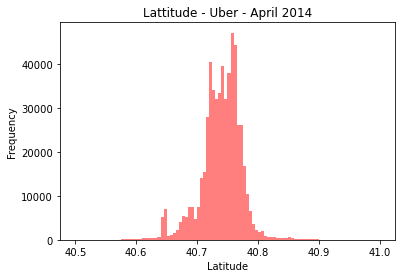

In [32]:
#Lat :
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Lattitude - Uber - April 2014');
plt.show()

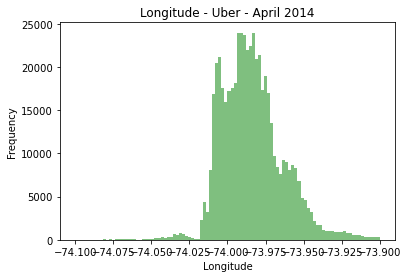

In [33]:
#Lon :
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Longitude - Uber - April 2014');
plt.show()

In [34]:
#Let us use twiny() function to overlap the two images with opacity 0.5

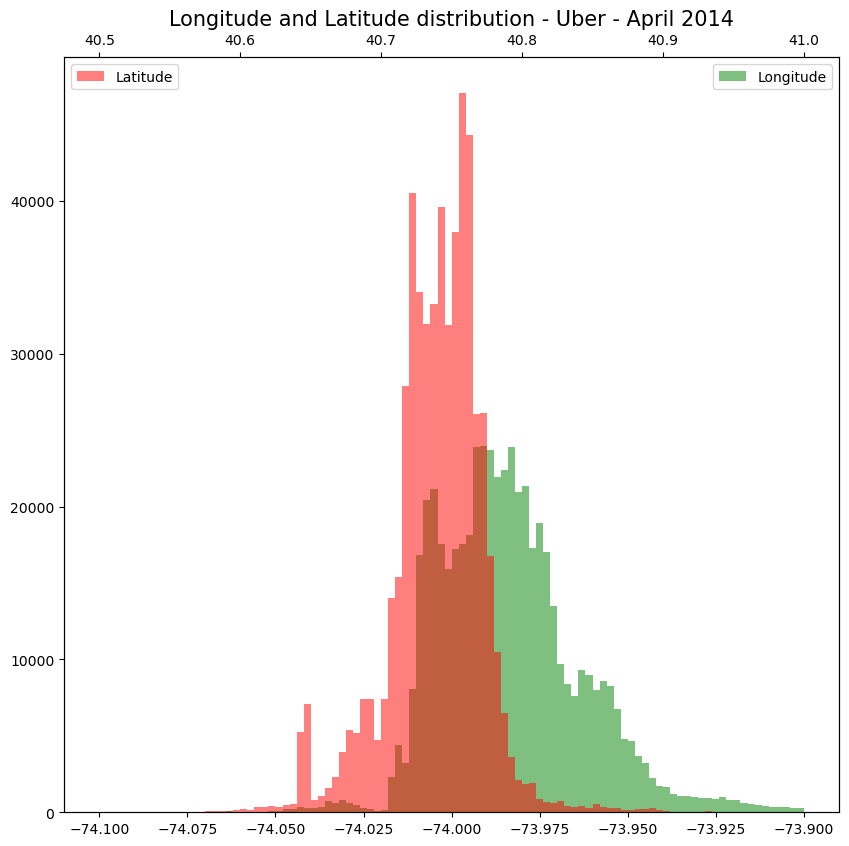

In [35]:
plt.figure(figsize=(10, 10), dpi=100)
plt.title('Longitude and Latitude distribution - Uber - April 2014',fontsize=15)
plt.hist(df['Lon'], bins = 100, range = (-74.1, -73.9), color = 'g', alpha = 0.5, label = 'Longitude')
plt.legend(loc = 'best')
plt.twiny()
plt.hist(df['Lat'], bins = 100, range = (40.5, 41), color = 'r',alpha = 0.5, label = 'Latitude')
plt.legend(loc = 'upper left')
plt.show()

''

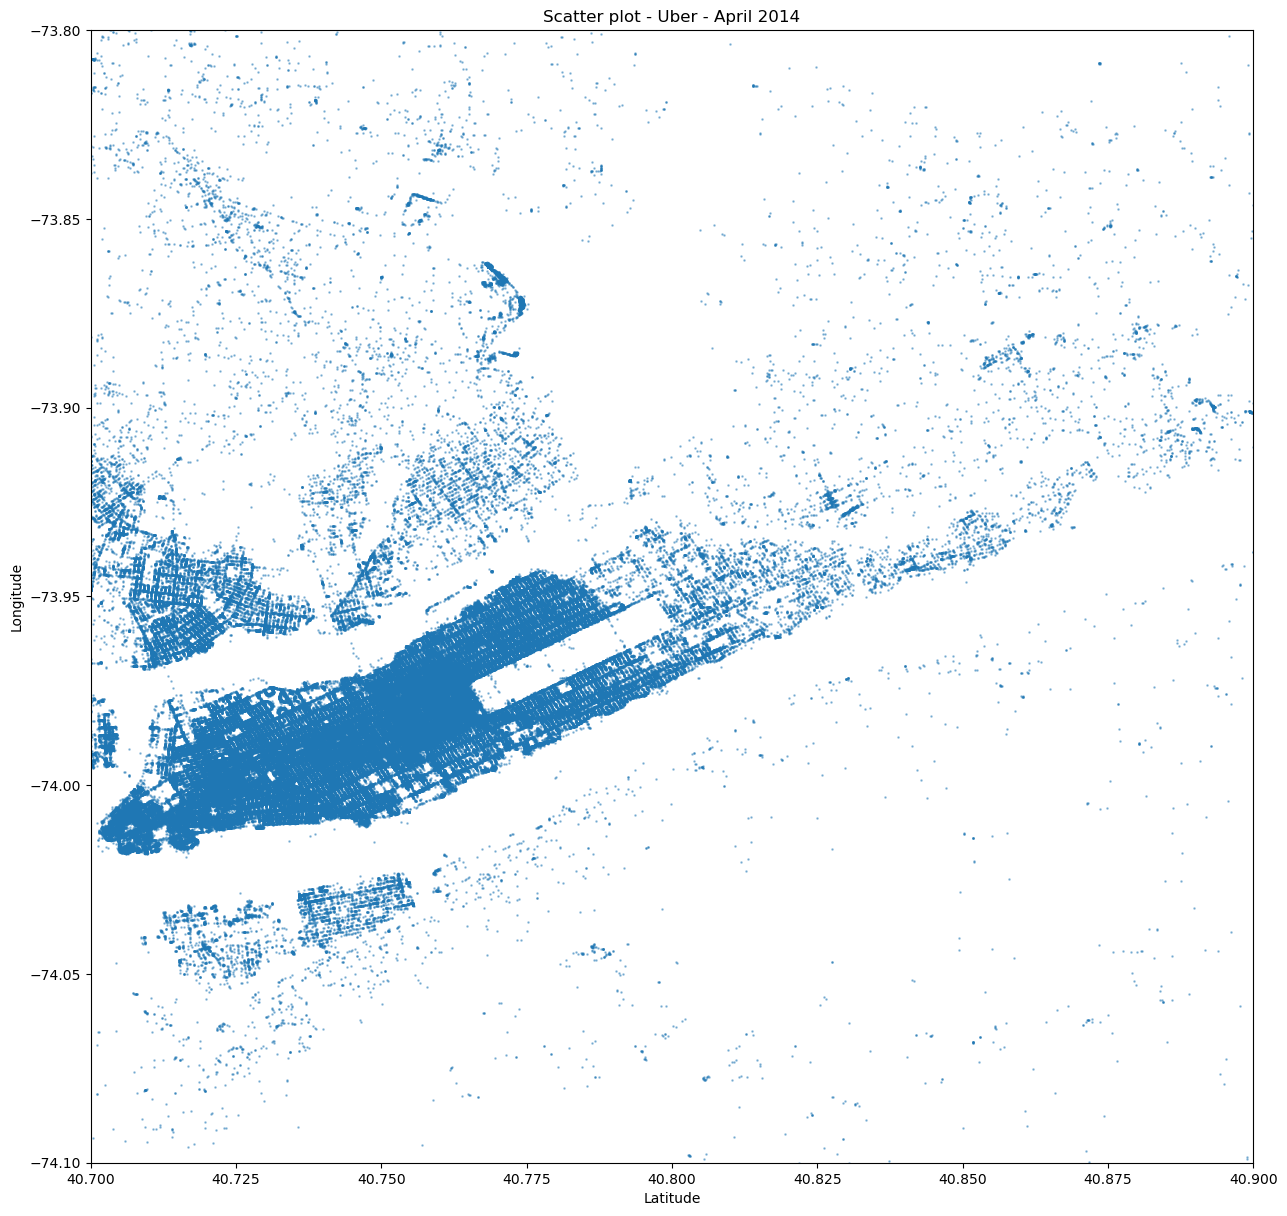

In [36]:
plt.figure(figsize=(15, 15), dpi=100)
plt.title('Scatter plot - Uber - April 2014')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(df['Lat'],df['Lon'],s=0.8,alpha=0.4) #Without list also shows the same plot
plt.ylim(-74.1, -73.8)
plt.xlim(40.7, 40.9)
;

*“By visualizing information, we turn it into a landscape that you can explore with your eyes. A sort of information map. And when you’re lost in information, an information map is kind of useful.”*